In [210]:
import pandas as pd
import numpy as np
train = pd.read_csv('Rental_B.csv')

In [211]:
print ("Train data shape:", train.shape)
#to see the sample size

('Train data shape:', (226195, 24))


In [212]:
train=train[train["price"].notnull()]
#the index does not match with system index.Should delete the old index, since 
#it has gaps in between

In [4]:
train.head()
#have a look at the data

Unnamed: 0                                         address  \
0          0                   East Street, London, IG11 8FA   
1          1             Abbeville Apartments, Barking, IG11   
2          2              Canonsleigh Road, Becontree, Essex   
3          3               St. Erkenwald Road, Barking, IG11   
4          6  Exeter House, 41 Academy Way, Dagenham RM8 2FP   

                                    agent bedroom                  created_at  \
0           Humphrey & Co Estates, London       1  2018-02-13 00:30:47.920695   
1                      Foxtons, Stratford       2  2018-02-13 00:30:47.944748   
2                      Woollens, Dagenham       3  2018-02-13 00:30:47.964100   
3                         Portico, Ilford       2  2018-02-13 00:30:47.981781   
4  Docklands Prestige Residential, London       3  2018-02-13 00:30:48.347993   

         date_added date_available  \
0   24 January 2018            NaN   
1               NaN            NaN   
2  02 February 2018            Now   
3   22 January 2018            Now   
4   13 January 2018     03/03/2018   

                                         description  \
0  London's Local Property Agent, Humphrey & Co E...   
1  LONG LET. This spacious and modern two bedroom...   
2  A newly refurbished and tastefully decorated t...   
3  New to the market is the amazing two bedroom a...   
4  Docklands Prestige Residential are pleased to ...   

                                            detailer  \
0  http://www.rightmove.co.uk/property-to-rent/pr...   
1  http://www.rightmove.co.uk/property-to-rent/pr...   
2  http://www.rightmove.co.uk/property-to-rent/pr...   
3  http://www.rightmove.co.uk/property-to-rent/pr...   
4  http://www.rightmove.co.uk/property-to-rent/pr...   

                                            features     ...       identifier  \
0  Key features **SEASONAL OFFER - NO ADMIN FEES!...     ...       52730868.0   
1  Key features Naturally bright and stylish two ...     ...       52473081.0   
2                                                NaN     ...       71234867.0   
3  Key features 2 Bedrooms New Block Large Two Be...     ...       52566495.0   
4  Key features Double Glazing Ensuite Bathroom E...     ...       52775034.0   

                                          image_urls        lat letting_type  \
0  http://media.rightmove.co.uk/dir/98k/97349/527...  51.537013          NaN   
1  http://media.rightmove.co.uk/dir/81k/80281/524...  51.537503    Long term   
2  http://media.rightmove.co.uk/dir/11k/10596/712...  51.537043          NaN   
3  http://media.rightmove.co.uk/dir/65k/64145/525...  51.535668    Long term   
4  http://media.rightmove.co.uk/dir/102k/101404/5...  51.549486    Long term   

        lng max_size  min_size  \
0  0.078770      NaN       NaN   
1  0.076486      NaN       NaN   
2  0.117273      NaN       NaN   
3  0.083612      NaN       NaN   
4  0.110495      NaN       NaN   

                                    nearest_stations  postal_code        price  
0  Barking (0.2 mi) Upney (1.0 mi) East Ham (1.2 mi)     IG11 8FA  1243.753333  
1  Barking (0.3 mi) Upney (1.1 mi) East Ham (1.1 mi)     IG11 8FW  1582.000000  
2  Becontree (0.5 mi) Upney (0.7 mi) Dagenham Hea...      RM9 4DH  1582.000000  
3  Barking (0.3 mi) Upney (0.8 mi) East Ham (1.4 mi)     IG11 7YL  1464.103333  
4  Upney (0.9 mi) Becontree (1.0 mi) Goodmayes (1...      RM8 2FP  1695.000000  

[5 rows x 24 columns]

In [5]:
train=train[train["lng"]<1]
train=train[train["lng"]>-1]
train=train[train["lat"]<53]
#removed those clearly wrong latitudes and longtitude observations for a better
#visuals representations

train = train.drop('max_size', 1)
train = train.drop('min_size', 1)
train = train.drop('detailer', 1)
train = train.drop('floorplan_urls', 1)
train = train.drop('id', 1)
train = train.drop('identifier', 1)
train = train.drop('image_urls', 1)
#remove max and min size since they are empty
#deleting the old index, and useless features 

In [551]:
#There are also 85 observations that has been splitted to saparete lines in excel,
#since the number is small, for the sake of analysis they are ignored.

In [6]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
#importing plot package

In [7]:
train.price.describe()
#to check the price, any unusual values


count     57833.000000
mean       3153.007121
std        8169.014020
min          56.500000
25%        1525.500000
50%        2028.350000
75%        3109.383333
max      931468.416667
Name: price, dtype: float64

In [8]:
train[train.price>931468]
#although the max value for monthly rent is 931468 is unbelievably high but 
#after checking the website, it is indeed priced as 931468 per month.
#The cheap monthly rent belongs to a garage. So now I know it's not only the 
#house is included.

Unnamed: 0                      address                   agent bedroom  \
17352      18836  Englefield Road, London, N1  Apartmentwharf, London       5   

                       created_at        date_added date_available  \
17352  2018-02-13 00:44:36.970519  06 February 2018            Now   

                                             description  \
17352  BEAUTIFUL DOUBLE ROOM AND EN-SUITE DOUBLE ROOM...   

                                                features  \
17352  Key features Spacious Big room Living room Wel...   

                                                    fees  furnished       lat  \
17352  The asking rent does not include letting fees....  Furnished  51.54255   

      letting_type       lng  \
17352          NaN -0.077163   

                                        nearest_stations postal_code  \
17352  Haggerston (0.2 mi) Dalston Junction (0.3 mi) ...      N1 4LN   

               price  
17352  931468.416667

In [9]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes
#pick out the numerical variables

lat      float64
lng      float64
price    float64
dtype: object

In [10]:
corr = numeric_features.corr()
print (corr['price'].sort_values(ascending=False))
#To see any strong or weak correlation between variables and price
#There's no strong correlation 

price    1.000000
lat     -0.001771
lng     -0.024822
Name: price, dtype: float64


In [557]:
#missing values 
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls
#clearly a lot of missing values
#at least need to remove those samples without prices



0
letting_type      30583
date_available    17518
date_added        17317
furnished         11989
features          10344
description        1798
fees                297
nearest_stations     34
created_at            0
address               0
agent                 0
bedroom               0
price                 0
postal_code           0
lat                   0
lng                   0
Unnamed: 0            0

In [12]:
train[train.price > 0].shape
#Only 57833 out of 63772 samples have price, 10% of data are unusable. 
#We can delete those missing prices observations since it relevantly small to 
#total number


(57833, 17)

In [14]:
#now plotting prices 

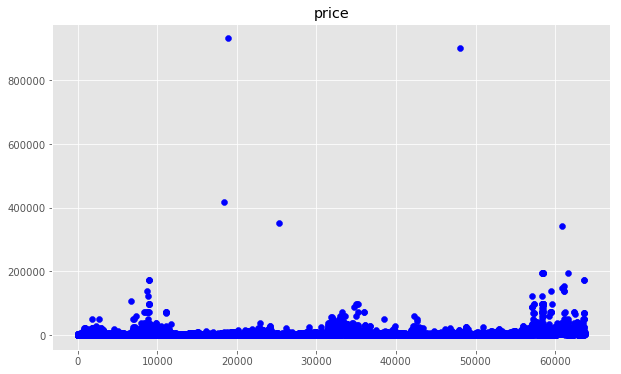

In [15]:
plt.scatter(train['Unnamed: 0'],train.price, color='b') 
plt.title('price')
plt.show()
#There are a few houses have way too high rent compare to the rest.
# best to remove it for a better fit

In [16]:
train=train[train["price"]<=200000]
#remove samples that has price greater than 200000

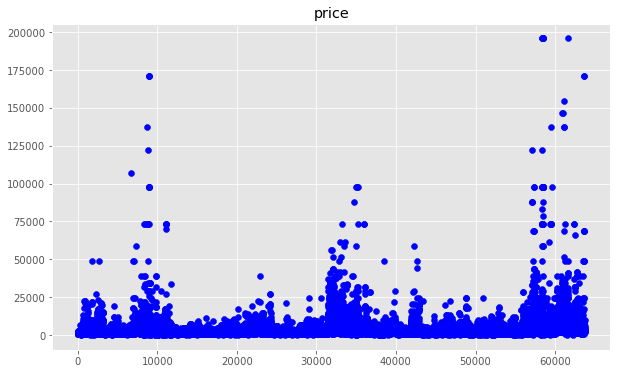

In [17]:
plt.scatter(train['Unnamed: 0'],train.price, color='b') 
plt.title('price')
plt.show()

('Skew is:', 16.260660339067517)


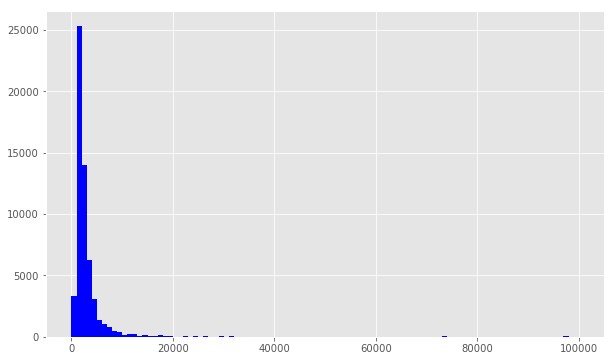

In [19]:
#histogram of the prices
print ("Skew is:", train.price.skew())
plt.hist(train.price, color='blue',bins=100,range=(0,100000))
plt.show()
#it's very skewed and hve lots of extreme values

('Skew is:', 1.0927565340700027)


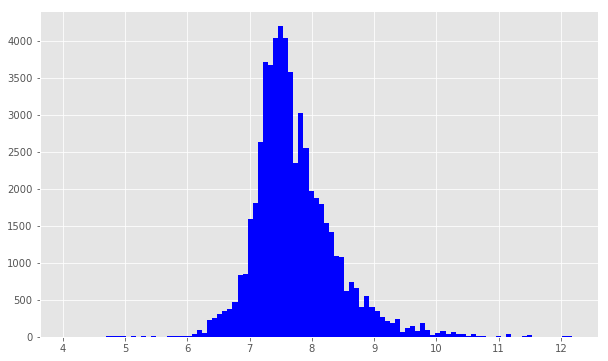

In [20]:
#let's see the log of prices
target = np.log(train.price)
print ("Skew is:", target.skew())
plt.hist(target, color='blue',bins=100)
plt.show()
#it seems to be closer to normal distribution now, with skewness closer to 0.

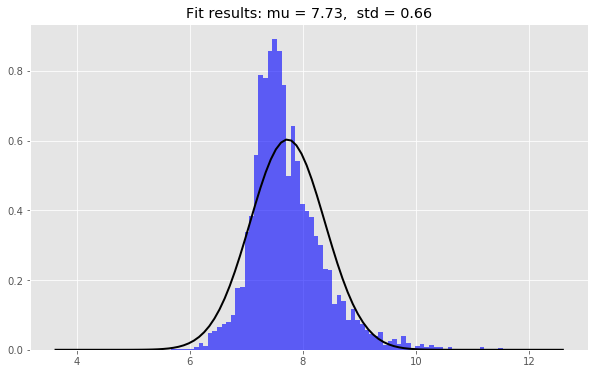

In [21]:
from scipy.stats import norm
import matplotlib.pyplot as plt
mu, std = norm.fit(target)

# Plot the histogram.
plt.hist(target, bins=100, normed=True, alpha=0.6,color='blue')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#certainly the normal distribution is a ok fit for a start.

In [22]:
train.bedroom.unique()
#to see how many different categories in bedroom, is it possible to convert all 
#into numbers?

array(['1', '2', '3', 'Studio', '4', '6', '5', 'semi-detached', 'house',
       'land', 'flat', '9', 'retirement', '10', '7', 'maisonette',
       'property', 'detached', 'parking', '8', 'garage', 'end',
       'equestrian', 'private', '12', 'terraced', 'town', '15', '64', '29',
       'bungalow', '11', 'penthouse', 'hotel', 'mews', 'duplex', '19',
       '635'], dtype=object)

In [23]:
#to see does bedroom number or type effect prices
quality_pivot = train.pivot_table(index='bedroom',values='price', aggfunc=np.median)
quality_pivot

price
bedroom                    
1               1593.300000
10              2887.150000
11             17138.333333
12             73450.000000
15             19464.250000
19             22279.833333
2               2081.083333
29              1077.266667
3               2815.583333
4               3164.000000
5               4294.000000
6               6102.000000
635             3109.383333
64               979.333333
7               7903.785000
8              10606.180000
9              13558.870000
Studio          1273.133333
bungalow         904.000000
detached        1412.500000
duplex          2289.191667
end              632.800000
equestrian      1130.000000
flat             734.500000
garage           181.930000
hotel           4407.000000
house            678.000000
land            1223.790000
maisonette      1101.750000
mews            3182.833333
parking          171.383333
penthouse       7430.691667
private         1659.970000
property        1958.666667
retirement       626.773333
semi-detached   1892.750000
terraced        1346.583333
town            2179.016667

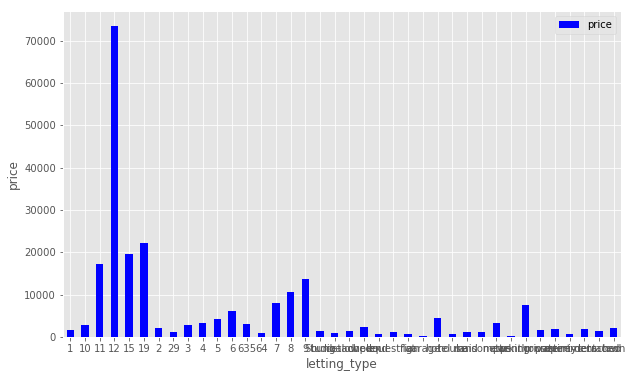

In [27]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('letting_type')
plt.ylabel('price')
plt.xticks(rotation=0)
plt.show()
# the properties has 12 bedrooms has the highest price

In [25]:
train[train.bedroom=='635']
#this is an error

Unnamed: 0                       address                       agent  \
215741      52406  Back Church Lane, London, E1  Tower Quay Limited, London   

       bedroom                  created_at        date_added date_available  \
215741     635  2018-02-13 01:11:16.843622  07 February 2018            NaN   

                                              description  \
215741  A rare opportunity to rent this three double b...   

                                                 features  \
215741  Key features Warehouse Conversion Open plan li...   

                                                     fees  \
215741  The asking rent does not include letting fees....   

                                             furnished        lat  \
215741  Furnished or unfurnished, landlord is flexible  51.512254   

       letting_type       lng  \
215741    Long term -0.066765   

                                         nearest_stations postal_code  \
215741  Aldgate East (0.3 mi) Tower Hill (0.3 mi) Towe...      E1 1AF   

              price  
215741  3109.383333

In [26]:
train.loc[215741,'bedroom']=3
#change it back to correct number

In [28]:
train.letting_type.unique()
#different types of letting term

array([nan, 'Long term', 'Short term', 'Student', 'Commercial'], dtype=object)

In [31]:
quality_pivot = train.pivot_table(index='letting_type', values='price', aggfunc=np.mean)
quality_pivot

price
letting_type             
Commercial    1765.060000
Long term     3206.935949
Short term    5975.882333
Student       2029.050860

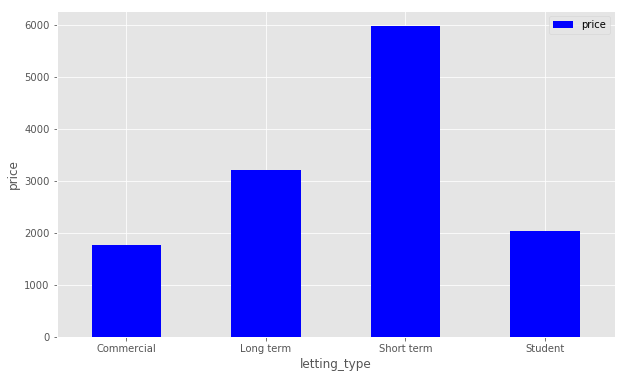

In [32]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('letting_type')
plt.ylabel('price')
plt.xticks(rotation=0)
plt.show()
#short term has a significant difference between the other

In [ ]:
#Feature Transformation

In [604]:
def encode(x): return 1 if x == 'Short term' else 0
train['enc_type'] = train.letting_type.apply(encode)

train['enc_type'] = pd.get_dummies(train.letting_type, drop_first=True)

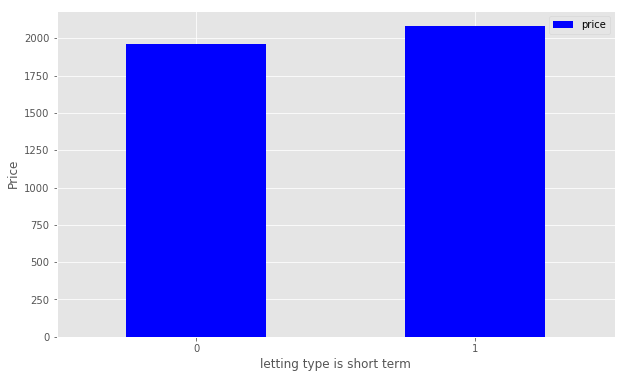

In [605]:
condition_pivot = train.pivot_table(index='enc_type', values='price', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('letting type is short term')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()
#there is a small difference between short term and other.

In [33]:
train.furnished.unique()
#to see all the distinct states of "furnished"

array([nan, 'Unfurnished', 'Part-furnished', 'Furnished',
       'Furnished or unfurnished, landlord is flexible', 'Not Specified'], dtype=object)

In [34]:
quality_pivot = train.pivot_table(index='furnished',
                                  values='price', aggfunc=np.mean)
quality_pivot

price
furnished                                                  
Furnished                                       3349.069411
Furnished or unfurnished, landlord is flexible  3838.137554
Not Specified                                   2886.575259
Part-furnished                                  2121.265377
Unfurnished                                     2684.556408

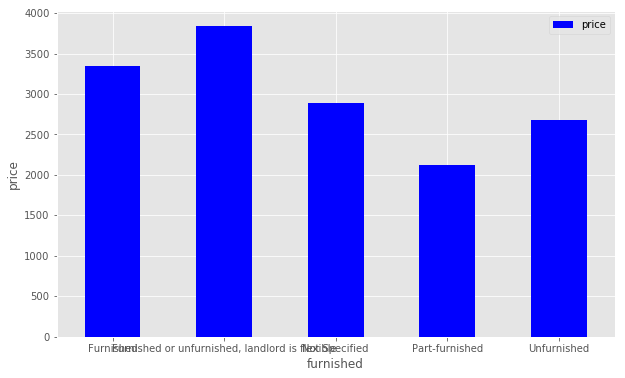

In [35]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('furnished')
plt.ylabel('price')
plt.xticks(rotation=0)
plt.show()
#we can see that "Furnished or unfurnished, landlord is flexible" category has 
# the highest price over other states of house. About 400 or more.

In [36]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
#checking the catagories of the factor variables

Unnamed: 0                   address             agent bedroom  \
count       57828                     57828             57828   57828   
unique      57828                     40011              3051      38   
top         38346  Hill Street, London, W1J  OpenRent, London       2   
freq            1                        78              1055   22339   

                        created_at        date_added date_available  \
count                        57828             40511          40312   
unique                       57828               803            335   
top     2018-02-13 01:08:09.008529  08 February 2018            Now   
freq                             1              1846          27089   

                                              description  \
count                                               56030   
unique                                              53877   
top     We combine premium facilities and service with...   
freq                                                   39   

                                                 features  \
count                                               47485   
unique                                              44095   
top     Key features Dryer Electric Stove Elevator Ent...   
freq                                                   68   

                                                     fees  furnished  \
count                                               57531      45840   
unique                                               2903          5   
top     The asking rent does not include letting fees....  Furnished   
freq                                                24028      22374   

       letting_type                                   nearest_stations  \
count         27248                                              57794   
unique            4                                              18621   
top       Long term  Green Park (0.4 mi) Hyde Park Corner (0.4 mi) ...   
freq          23616                                                414   

       postal_code  
count        57828  
unique       26378  
top        W1J 5NA  
freq           296

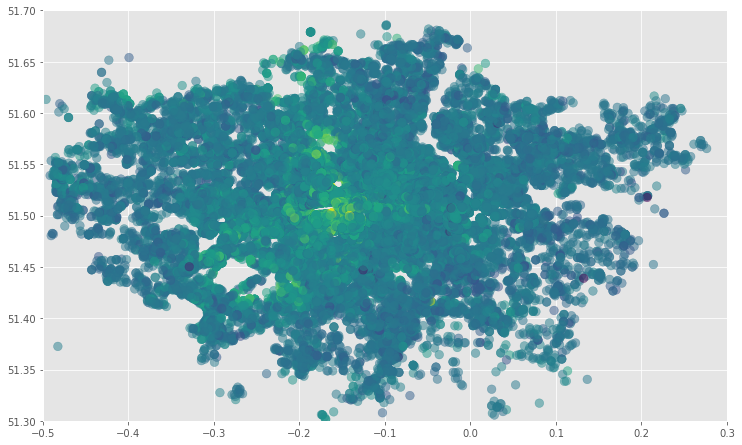

In [44]:
import matplotlib.pyplot as plt

X = train.lng
Y = train.lat
T = target
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5)
plt.xlim(-0.5, 0.3)
plt.ylim(51.3, 51.7)
plt.show()

#seems like around (51.5,-0.15) area has the highest rent.

In [45]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
data.head()

lat       lng        price
0  51.537013  0.078770  1243.753333
1  51.537503  0.076486  1582.000000
2  51.537043  0.117273  1582.000000
3  51.535668  0.083612  1464.103333
4  51.549486  0.110495  1695.000000

In [47]:
#modelling

y = np.log(train.price)
X = data.drop(['price'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)


In [48]:
from sklearn import linear_model
lr = linear_model.LinearRegression()


In [49]:
model = lr.fit(X_train, y_train)

In [50]:
print ("R^2 is: \n", model.score(X_test, y_test))
#very small R^2, model didn't explain data well

('R^2 is: \n', 0.013179650695225753)


In [51]:
predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
#it's better but still not ideal

('RMSE is: \n', 0.43125436892241231)


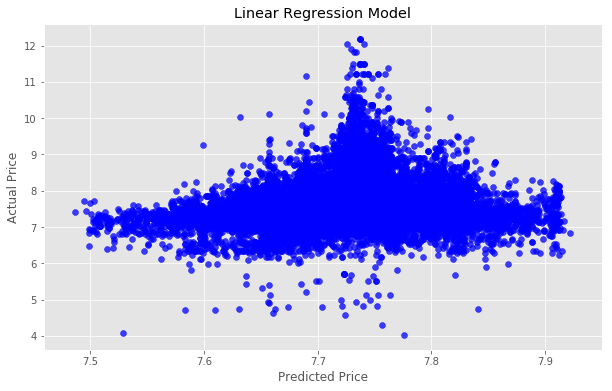

In [53]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

plt.title('Linear Regression Model')
plt.show()

In [419]:
#don't think the linear regression fits well in here

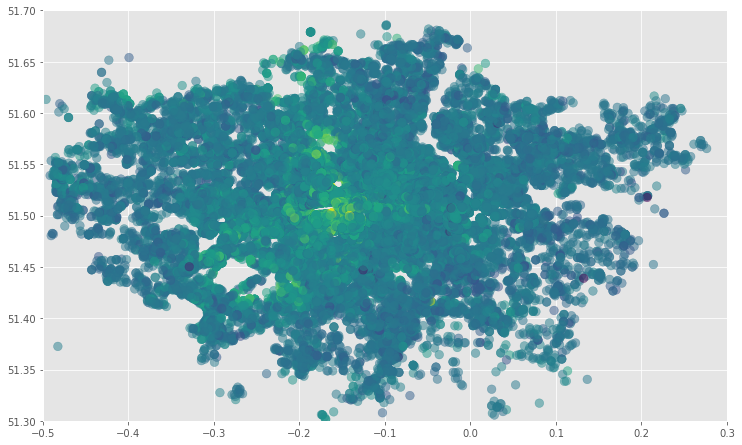

In [56]:
#try a different approach


X = train.lng
Y = train.lat
T = target
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5)
plt.xlim(-0.5, 0.3)
plt.ylim(51.3, 51.7)
plt.show()


In [57]:
train.shape

(57828, 17)

In [258]:
#sort out all different types of bedrooms
#You can find all types of bedroom numbers here
bed={}
for i in train.bedroom:
    if i not in bed.keys():
        bed[i]=train[train['bedroom']==i]
print bed.keys()

['penthouse', 'maisonette', 'house', 'private', '64', 'parking', '5', '635', '1', 'retirement', 'end', 'duplex', '29', 'semi-detached', '3', '2', 'Studio', '4', '7', '6', '9', '8', 'flat', 'mews', 'equestrian', 'hotel', '12', 'terraced', 'town', '10', 'land', '15', '19', 'garage', 'bungalow', '11', 'detached', 'property']


In [259]:

#I decide use a simpler approach, using the geographic data to predict the price
#so only the latitude and longtitude matters to me.

import math


a=-0.131301326567043
b=51.5094335521012
c='Studio' #type of bedroom

#a(longtitude) and b (latitude) are the new location you wish to predict the 
#price.

price=0
j=0


for i in train.index:
    if math.sqrt((train.lat[i]-b)*(train.lat[i]-b)+(train.lng[i]-a)*(train.lng[i]-a)) <=0.05:
        if train.bedroom[i]==c:
            price+=train.price[i]
            j+=1
print(price/j)      
print('There are',j,'properties around with same type of bedrooms.')

1872.91297631
('There are', 999, 'properties around with same type of bedrooms.')


In [237]:
#bedprice={}
#for i in sorted(bed.keys()):
      #  bedprice[i]=bed[i]['price'].mean()

In [ ]:
#Final comments,

#I could add more conditions for the averaging process, such as look for those 
#houses has the same "lenting type" and "furnished or not" to refine my
#estimation, but as we add more conditions, there may not be enough houses
#to calculate a meaningful mean, near the point where you want to estimate.

In [ ]:
#I have tested a few houses I found on rightmove, seems reansonably close to 
#the price with difference under £1000.